In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
from sklearn.decomposition import PCA


def apply_feature_extraction(Xtrain, Xtest):
    model = PCA(n_components=0.99)
    print(model.n_components)
    Xtrain_transformed = model.fit_transform(Xtrain)
    Xtest_transformed = model.transform(Xtest)
    print(f"Reduced number of features: {Xtrain_transformed.shape[1]}")
    return Xtrain_transformed, Xtest_transformed


X_train = np.load('x_train.npy')
y_train = np.load('y_train.npy')

X_test = np.load('X_test.npy')
y_test = np.load('y_test.npy')

#X_train, X_test = apply_feature_extraction(X_train, X_test)

possible_status = ['0: AddWeight', '1: Normal', '2: PressureGain_constant',
 '3: PropellerDamage_bad', '4: PropellerDamage_slight']


rfc = RandomForestClassifier(random_state=0, n_estimators=1000)         # 3407
rfc = rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)


Random Forest: 0.9755102040816327
Accuracy: 0.9755102040816327
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      0.97      0.99        36
           2       0.96      1.00      0.98        53
           3       0.96      0.96      0.96        50
           4       0.96      0.94      0.95        52

    accuracy                           0.98       245
   macro avg       0.98      0.97      0.98       245
weighted avg       0.98      0.98      0.98       245

[[54  0  0  0  0]
 [ 0 35  1  0  0]
 [ 0  0 53  0  0]
 [ 0  0  0 48  2]
 [ 0  0  1  2 49]]


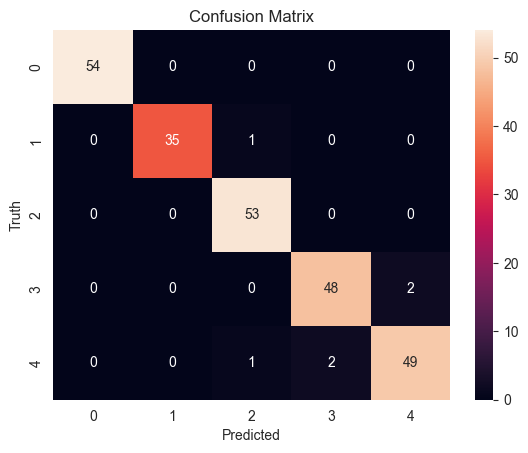

In [2]:
score_r = rfc.score(X_test, y_test)
print("Random Forest: {}" .format(score_r))
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)
print(cm)

plt.figure()
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix')
#plt.legend(possible_status)
plt.show()

[DecisionTreeClassifier(max_features='sqrt', random_state=209652396), DecisionTreeClassifier(max_features='sqrt', random_state=398764591), DecisionTreeClassifier(max_features='sqrt', random_state=924231285), DecisionTreeClassifier(max_features='sqrt', random_state=1478610112), DecisionTreeClassifier(max_features='sqrt', random_state=441365315), DecisionTreeClassifier(max_features='sqrt', random_state=1537364731), DecisionTreeClassifier(max_features='sqrt', random_state=192771779), DecisionTreeClassifier(max_features='sqrt', random_state=1491434855), DecisionTreeClassifier(max_features='sqrt', random_state=1819583497), DecisionTreeClassifier(max_features='sqrt', random_state=530702035), DecisionTreeClassifier(max_features='sqrt', random_state=626610453), DecisionTreeClassifier(max_features='sqrt', random_state=1650906866), DecisionTreeClassifier(max_features='sqrt', random_state=1879422756), DecisionTreeClassifier(max_features='sqrt', random_state=1277901399), DecisionTreeClassifier(max

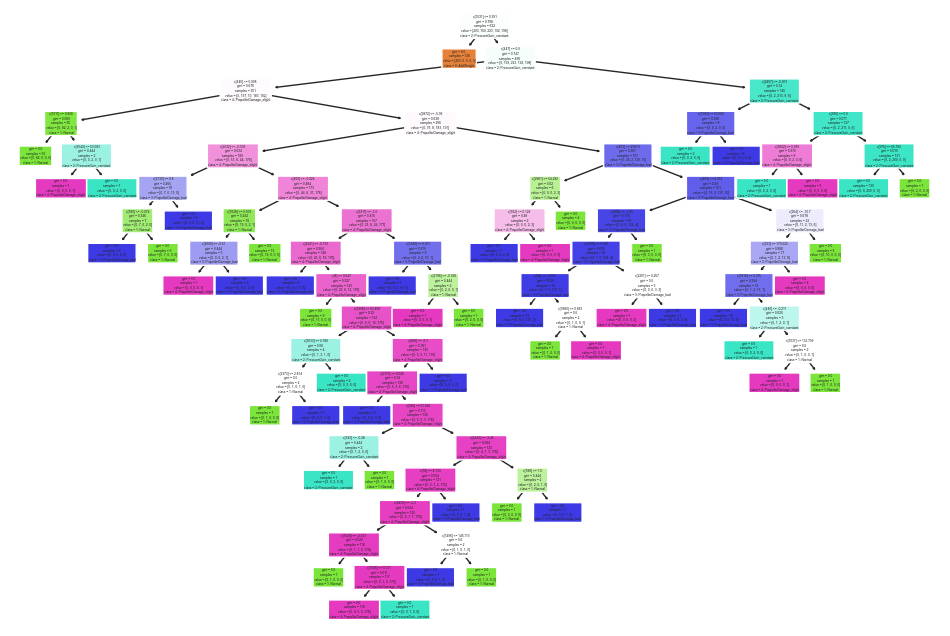

<Figure size 640x480 with 0 Axes>

In [10]:
from sklearn import tree
import matplotlib.pyplot as plt

estimators = rfc.estimators_
print(estimators)
# Visualize the first tree
plt.figure(figsize=(12, 8))
tree.plot_tree(estimators[0], filled=True, class_names=possible_status, rounded=True)
plt.show()
plt.savefig('tree.png')